## Demonstrate Feature Engineering and Supervised Learning Approach for Time Series Data
F. Burkholder

The modeling approach presented here is based on: 
* [Automated Feature Engineering for Time Series Data](https://www.kdnuggets.com/2017/11/automated-feature-engineering-time-series-data.html)
* [6 Powerful Feature Engineering Techniques For Time Series Data (using Python)](https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/)

The notebook was expanded and adapted from the one in [this Github.](https://github.com/agarwalpooja/time_series_analysis/find/master?q=)

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series

import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})

### Data are ridership data from JetRail - a high-speed public rail service
JetRail’s usage has increased recently and we have to forecast August 2014's hourly ridership based what we know by July 1st (end of June.)  We'll use July as the validation set.

In [3]:
# Read in the data
data=pd.read_csv("Train_SU63ISt.csv")

In [4]:
data.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


### Data are hourly ridership counts
Though right now "Datetime" is not a Datetime datatype.

## Clean data to plot 

In [6]:
def create_df_with_datetime_col(df):
    df = df.copy()
    df.drop(columns=['ID'], inplace=True)
    df['Datetime'] = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M')
    return df

In [7]:
df_data = create_df_with_datetime_col(data)

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  18288 non-null  datetime64[ns]
 1   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 285.9 KB


In [9]:
def start_and_end_dates(df):
    start = df['Datetime'].min()
    end = df['Datetime'].max()
    return start, end

In [10]:
start_date, end_date = start_and_end_dates(df_data)
print("Start, end date")
print(f"{start_date}, {end_date}")

Start, end date
2012-08-25 00:00:00, 2014-09-25 23:00:00


In [11]:
# create date and time features
def create_datetime_features(df):
    df['year'] = df.Datetime.dt.year 
    df['month'] = df.Datetime.dt.month 
    df['day'] = df.Datetime.dt.day
    df['hour'] = df.Datetime.dt.hour
    df['dow'] = df.Datetime.dt.dayofweek

In [12]:
create_datetime_features(df_data)

In [13]:
df_data.head()

,Datetime,Count,year,month,day,hour,dow
0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [14]:
def is_weekend(dow):
    if (dow == 5 or dow == 6):
        return 1
    return 0

In [15]:
df_data['weekend'] = df_data['dow'].apply(is_weekend)
print(df_data.head())
print(df_data.tail())

             Datetime  Count  year  month  day  hour  dow  weekend
0 2012-08-25 00:00:00      8  2012      8   25     0    5        1
1 2012-08-25 01:00:00      2  2012      8   25     1    5        1
2 2012-08-25 02:00:00      6  2012      8   25     2    5        1
3 2012-08-25 03:00:00      2  2012      8   25     3    5        1
4 2012-08-25 04:00:00      2  2012      8   25     4    5        1
                 Datetime  Count  year  month  day  hour  dow  weekend
18283 2014-09-25 19:00:00    868  2014      9   25    19    3        0
18284 2014-09-25 20:00:00    732  2014      9   25    20    3        0
18285 2014-09-25 21:00:00    702  2014      9   25    21    3        0
18286 2014-09-25 22:00:00    580  2014      9   25    22    3        0
18287 2014-09-25 23:00:00    534  2014      9   25    23    3        0


In [16]:
def set_index_to_datetime(df):
    '''Set dataframe index to datetime, but keep as column too'''
    df.index = df['Datetime']

In [17]:
set_index_to_datetime(df_data)

In [18]:
df_data.head()

,Datetime,Count,year,month,day,hour,dow,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [19]:
df_data.rename(columns={'Count': 'count'}, inplace=True)

In [20]:
df_data.head()

,Datetime,count,year,month,day,hour,dow,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


### Create train, validation, and holdout sets

In [21]:
train_start = '2012-08-25'
train_end = '2014-06-30'

validation_start = '2014-07-01'
validation_end = '2014-07-31'

holdout_start = '2014-08-01'
holdout_end = '2014-08-31'

df_train = df_data.loc[train_start:train_end,:].copy()
df_validate = df_data.loc[validation_start:validation_end,:].copy()
df_holdout = df_data.loc[holdout_start:holdout_end,:].copy()

In [22]:
print(df_train.shape)
print(df_validate.shape)
print(df_holdout.shape)

(16200, 8)
(744, 8)
(744, 8)


In [23]:
df_train.head()

,Datetime,count,year,month,day,hour,dow,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [24]:
df_holdout.head()

,Datetime,count,year,month,day,hour,dow,weekend
Datetime,,,,,,,,
2014-08-01 00:00:00,2014-08-01 00:00:00,382,2014,8,1,0,4,0
2014-08-01 01:00:00,2014-08-01 01:00:00,278,2014,8,1,1,4,0
2014-08-01 02:00:00,2014-08-01 02:00:00,236,2014,8,1,2,4,0
2014-08-01 03:00:00,2014-08-01 03:00:00,216,2014,8,1,3,4,0
2014-08-01 04:00:00,2014-08-01 04:00:00,176,2014,8,1,4,4,0


## EDA: let's visualize the ridership

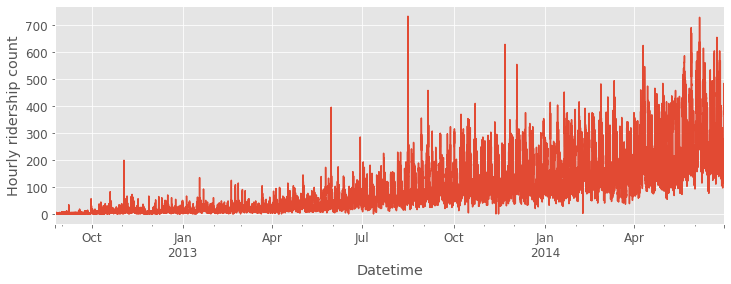

In [25]:
ax = df_train['count'].plot(figsize=(12,4))
ax.set_ylabel('Hourly ridership count');

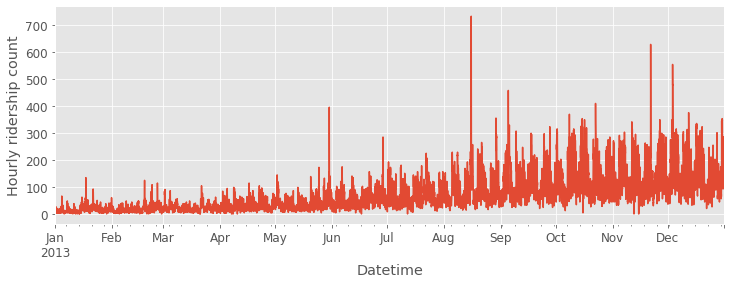

In [26]:
# let's just look at 2013
mask_2013 = df_train['year'] == 2013
df_2013 = df_train[mask_2013]
ax = df_2013['count'].plot(figsize=(12,4))
ax.set_ylabel('Hourly ridership count');

In [27]:
def is_summer(month):
    if (month == 6 or month == 7 or month == 8):
        return 1
    return 0

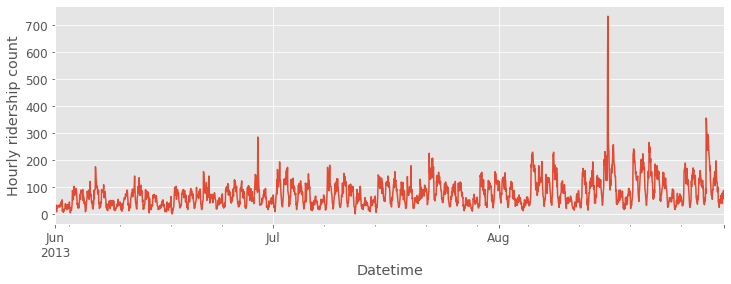

In [28]:
# the summer of 2013
mask_summer = df_train['month'].apply(is_summer)
mask_summer_2013 = mask_2013 & mask_summer
df_summer_2013 = df_train[mask_summer_2013]
ax = df_summer_2013['count'].plot(figsize=(12,4))
ax.set_ylabel('Hourly ridership count');

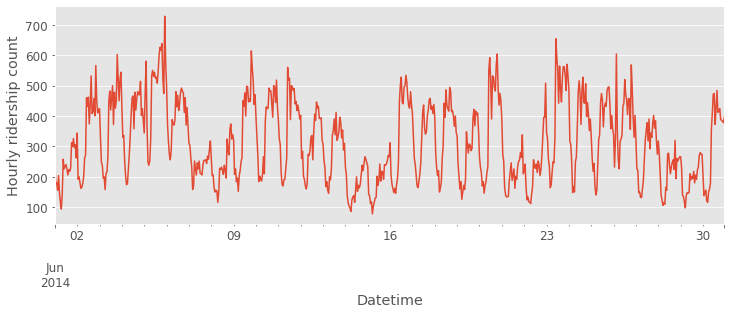

In [29]:
# let's look at the last month of the training set
mask_2014 = df_train['year'] == 2014
mask_June = df_train['month'] == 6
mask_June_2014 = mask_June & mask_2014
df_June_2014 = df_train[mask_June_2014]
ax = df_June_2014['count'].plot(figsize=(12,4))
ax.set_ylabel('Hourly ridership count');

### Let's look at yearly, monthly, daily, weekday/weekend averages to look for useful differences

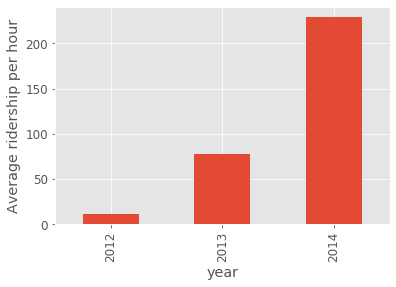

In [30]:
# Yearly averages
ax = df_train.groupby('year')['count'].mean().plot.bar()
ax.set_ylabel('Average ridership per hour');

#### There is an average hourly ridership signal here - year is a good feature.

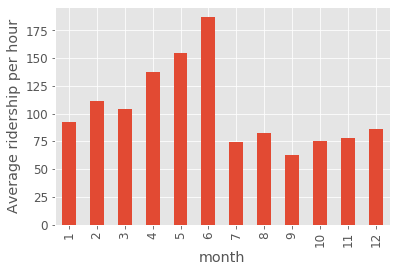

In [31]:
# Monthly averages
ax = df_train.groupby('month')['count'].mean().plot.bar()
ax.set_ylabel('Average ridership per hour');

#### Looks like the month feature should help determine hourly ridership.

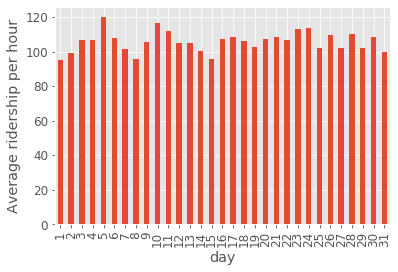

In [32]:
# day of month averages
ax = df_train.groupby('day')['count'].mean().plot.bar();
ax.set_ylabel('Average ridership per hour');

#### This day of month feature isn't clear.  There is some sinusoidal behavior that could be weekly.

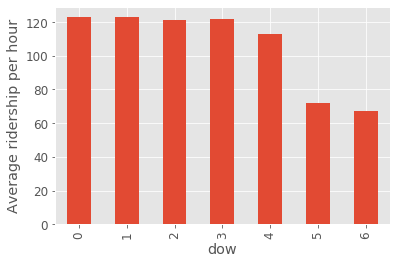

In [33]:
# day-of-week averages
ax = df_train.groupby('dow')['count'].mean().plot.bar();
ax.set_ylabel('Average ridership per hour');

#### Days 0-4 (weekdays) are roughly the same, as are 5-6 (weekend)

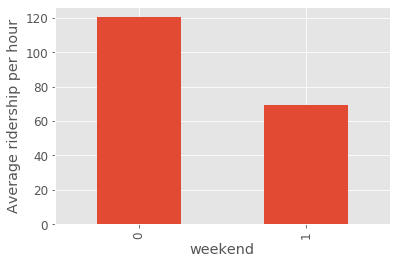

In [34]:
# weekday/weekend (1 is weekend)
ax = df_train.groupby('weekend')['count'].mean().plot.bar();
ax.set_ylabel('Average ridership per hour');

#### There is signal here:  weekend or not is a useful feature for predicting average hourly ridership.

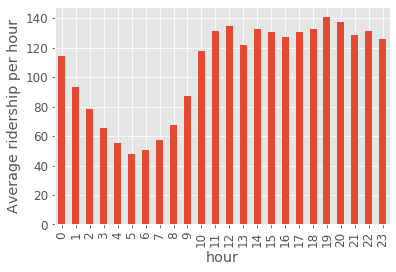

In [35]:
# by hour
ax = df_train.groupby('hour')['count'].mean().plot.bar();
ax.set_ylabel('Average ridership per hour');

#### There is signal here, too.  However, it doesn't like we need to know exactly what hour is it.  Rather, there are peak (10 am - 12 am), wing (1 am - 3am and 7 am - 9 am), and offpeak (4 am - 6 am) time bands.


In [36]:
def time_band(hour):
    if (hour == 0 or hour >= 10):
        return 'peak'
    wing1 = (hour >= 1 and hour <= 3)
    wing2 = (hour >= 7 and hour <= 9)
    if (wing1 or wing2):
        return 'wing'
    if (hour >= 4 and hour <= 6):
        return 'offpeak'

In [37]:
df_train['band'] = df_train['hour'].apply(time_band)

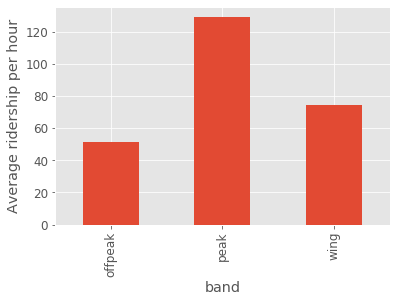

In [38]:
# by time band
ax = df_train.groupby('band')['count'].mean().plot.bar();
ax.set_ylabel('Average ridership per hour');

####  There is an average hourly ridership signal using this feature.  Let's encode it numerically in the train, validate, and holdout sets.

In [39]:
def is_peak(hour):
    if (hour == 0 or hour >= 10):
        return 1
    return 0

def is_wing(hour):
    wing1 = (hour >= 1 and hour <= 3)
    wing2 = (hour >= 7 and hour <= 9)
    if (wing1 or wing2):
        return 1
    return 0

def is_offpeak(hour):
    if (hour >= 4 and hour <= 6):
        return 1
    return 0

In [40]:
df_train['peak'] = df_train['hour'].apply(is_peak)
df_validate['peak'] = df_validate['hour'].apply(is_peak)
df_holdout['peak'] = df_holdout['hour'].apply(is_peak)

df_train['wing'] = df_train['hour'].apply(is_wing)
df_validate['wing'] = df_validate['hour'].apply(is_wing)
df_holdout['wing'] = df_holdout['hour'].apply(is_wing)

df_train['offpeak'] = df_train['hour'].apply(is_offpeak)
df_validate['offpeak'] = df_validate['hour'].apply(is_offpeak)
df_holdout['offpeak'] = df_holdout['hour'].apply(is_offpeak)

In [41]:
df_train.head()

,Datetime,count,year,month,day,hour,dow,weekend,band,peak,wing,offpeak
Datetime,,,,,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1,peak,1,0,0
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1,wing,0,1,0
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1,wing,0,1,0
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1,wing,0,1,0
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1,offpeak,0,0,1


#### Now we have some data and time features that we think provide signal into hourly ridership.  

#### Let's featurize past ridership counts to predict the future.

#### Rolling window feature

The size of a rolling window is something that is experimented with and will depend on how  you wish to model the target.  Here, let's decide to use 10 days of data from 60-70 days ago to make a prediction.  The dates from 2014 below are approximate.
<blockquote>
May 20-----------May 30---------------------------------------------------August 1<br>
June 20----------June 30--------------------------------------------------August 31<br>
window start&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;window stop&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;prediction
</blockquote>

The simplest rolling value to calculate is the mean.

In [42]:
from datetime import timedelta

def rolling_mean_count(dte, days_back, num_days, df):
    hours_back_start = (days_back + num_days) * 24
    hours_back_end = days_back * 24
    date_back_start = dte - timedelta(hours=hours_back_start)
    date_back_end = dte - timedelta(hours=hours_back_end)
    df_ss = df.loc[date_back_start:date_back_end]
    rolling_mean = df_ss['count'].mean()
    return rolling_mean

In [43]:
# test it out
dte = df_train.index[11856]
dte

Timestamp('2014-01-01 00:00:00')

In [44]:
rolling_mean_count(dte, 60, 10, df_data)  # finds the rolling mean from 60 - 70 days ago

138.02489626556016

In [45]:
# apply it to the dataframe
df_train['rolling_mean_count'] = df_train.apply(lambda row: rolling_mean_count(
                                                            row['Datetime'],
                                                            60,
                                                            10,
                                                            df_data), axis=1)

In [46]:
df_train.head()

,Datetime,count,year,month,day,hour,dow,weekend,band,peak,wing,offpeak,rolling_mean_count
Datetime,,,,,,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1,peak,1,0,0,NaN
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1,wing,0,1,0,NaN
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1,wing,0,1,0,NaN
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1,wing,0,1,0,NaN
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1,offpeak,0,0,1,NaN


#### There are NaNs to start because there aren't data 60-70 days prior.

In [47]:
df_train.iloc[1450:1455]

,Datetime,count,year,month,day,hour,dow,weekend,band,peak,wing,offpeak,rolling_mean_count
Datetime,,,,,,,,,,,,,
2012-10-24 10:00:00,2012-10-24 10:00:00,4,2012,10,24,10,2,0,peak,1,0,0,3.272727
2012-10-24 11:00:00,2012-10-24 11:00:00,6,2012,10,24,11,2,0,peak,1,0,0,3.500000
2012-10-24 12:00:00,2012-10-24 12:00:00,10,2012,10,24,12,2,0,peak,1,0,0,3.538462
2012-10-24 13:00:00,2012-10-24 13:00:00,14,2012,10,24,13,2,0,peak,1,0,0,3.428571
2012-10-24 14:00:00,2012-10-24 14:00:00,6,2012,10,24,14,2,0,peak,1,0,0,3.600000


#### Now rolling_mean_count has values.

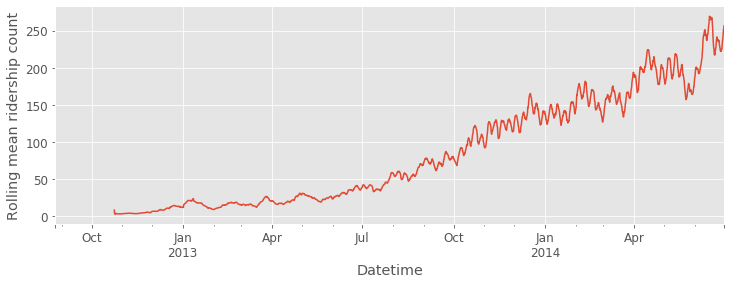

In [48]:
ax = df_train['rolling_mean_count'].plot(figsize=(12,4))
ax.set_ylabel('Rolling mean ridership count');

In [49]:
# repeat for validation and holdout sets
df_validate['rolling_mean_count'] = df_validate.apply(lambda row: rolling_mean_count(
                                                             row['Datetime'],
                                                             60,
                                                             10,
                                                             df_data), axis=1)

df_holdout['rolling_mean_count'] = df_holdout.apply(lambda row: rolling_mean_count(
                                                           row['Datetime'],
                                                           60,
                                                           10,
                                                           df_data), axis=1)

In [50]:
# check
df_validate.head(2)

,Datetime,count,year,month,day,hour,dow,weekend,peak,wing,offpeak,rolling_mean_count
Datetime,,,,,,,,,,,,
2014-07-01 00:00:00,2014-07-01 00:00:00,340,2014,7,1,0,1,0,1,0,0,255.485477
2014-07-01 01:00:00,2014-07-01 01:00:00,218,2014,7,1,1,1,0,0,1,0,255.311203


In [51]:
df_holdout.head(2)

,Datetime,count,year,month,day,hour,dow,weekend,peak,wing,offpeak,rolling_mean_count
Datetime,,,,,,,,,,,,
2014-08-01 00:00:00,2014-08-01 00:00:00,382,2014,8,1,0,4,0,1,0,0,289.634855
2014-08-01 01:00:00,2014-08-01 01:00:00,278,2014,8,1,1,4,0,0,1,0,288.796680


### Make training matrix

* We are training a model to predict an hourly ridership count 60 days into the future.
    * our target: hourly count
* We plan to use the following features:
    * year
    * month
    * weekend
    * peak
    * wing
    * offpeak
    * rolling_mean_count

#### Make the X and y training matrices

In [52]:
# There are NaNs at start of train due to rolling mean, subset to 2013 and on.
df_Xytrain = df_train.loc['2013-01-01':'2014-06-30'].copy()

In [53]:
df_Xytrain.head(2)

,Datetime,count,year,month,day,hour,dow,weekend,band,peak,wing,offpeak,rolling_mean_count
Datetime,,,,,,,,,,,,,
2013-01-01 00:00:00,2013-01-01 00:00:00,20,2013,1,1,0,1,0,peak,1,0,0,11.692946
2013-01-01 01:00:00,2013-01-01 01:00:00,44,2013,1,1,1,1,0,wing,0,1,0,11.651452


In [54]:
df_X = df_Xytrain[['year', 'month', 'weekend', 'peak', 'wing', 
                'offpeak', 'rolling_mean_count']].copy()

y = df_Xytrain['count'].values

In [55]:
df_X.head(2)

,year,month,weekend,peak,wing,offpeak,rolling_mean_count
Datetime,,,,,,,
2013-01-01 00:00:00,2013,1,0,1,0,0,11.692946
2013-01-01 01:00:00,2013,1,0,0,1,0,11.651452


In [56]:
X = df_X.values
print(X.shape)
X

(13104, 7)


array([[2.01300000e+03, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.16929461e+01],
       [2.01300000e+03, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.16514523e+01],
       [2.01300000e+03, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.16099585e+01],
       ...,
       [2.01400000e+03, 6.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.56746888e+02],
       [2.01400000e+03, 6.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.56365145e+02],
       [2.01400000e+03, 6.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.55892116e+02]])

In [57]:
print(y.shape)
y

(13104,)


array([ 20,  44,  28, ..., 382, 378, 398])

### Supervised learning

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

In [59]:
regressor = GradientBoostingRegressor() # just defaults

In [60]:
regressor.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Let's see how we do on the validation set

In [61]:
df_X_validate = df_validate[['year', 'month', 'weekend', 'peak', 'wing', 
                'offpeak', 'rolling_mean_count']].copy()

X_validate = df_X_validate.values

y_validate = df_validate['count'].values

In [62]:
y_hat_valid = regressor.predict(X_validate)

In [63]:
y_data_valid = np.hstack([y_hat_valid.reshape(-1,1), y_validate.reshape(-1,1)])

In [64]:
df_y_validate = pd.DataFrame(index=df_X_validate.index, 
                             columns=['y_hat','y_validate'],
                             data = y_data_valid)

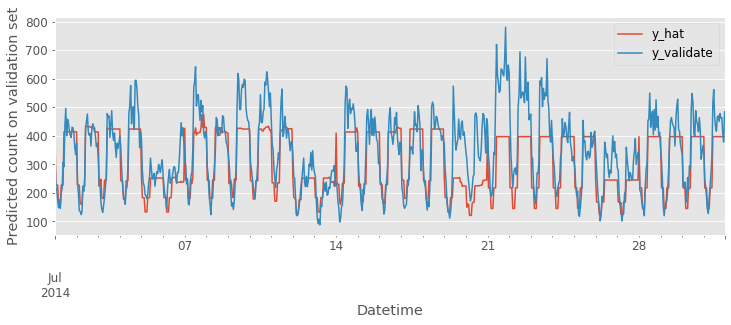

In [65]:
ax = df_y_validate[['y_hat','y_validate']].plot(figsize=(12,4))
ax.set_ylabel('Predicted count on validation set');

### More work is needed!  

I'm missing a general increasing trend during the month.  Plus, hourly has been lumped into 3 tiers (peak, wing, offpeak) - maybe that's too crude.  The length of the rolling window could be modified, too.  And I didn't include a rolling window statistic for minimum, maximum, or standard deviation.  These are all featurization methods to try.

So next steps:
* Calculate an error metric
* Refeaturize as described above
* Re-calculate performance on the validation set
* Pick the model that does best in this process and finally evaluate on holdout set 

### (Ok, you want to see how it does on the holdout anyway)

In [66]:
df_Xholdout = df_holdout[['year', 'month', 'weekend', 'peak', 'wing', 
                'offpeak', 'rolling_mean_count']].copy()

X_holdout = df_Xholdout.values

y_holdout = df_holdout['count'].values

In [67]:
y_predict = regressor.predict(X_holdout)

In [68]:
y_compare = np.hstack([y_predict.reshape(-1,1), y_holdout.reshape(-1,1)])

In [69]:
df_y_compare = pd.DataFrame(index=df_Xholdout.index, 
                           columns=['y_predict','y_holdout'],
                           data = y_compare)

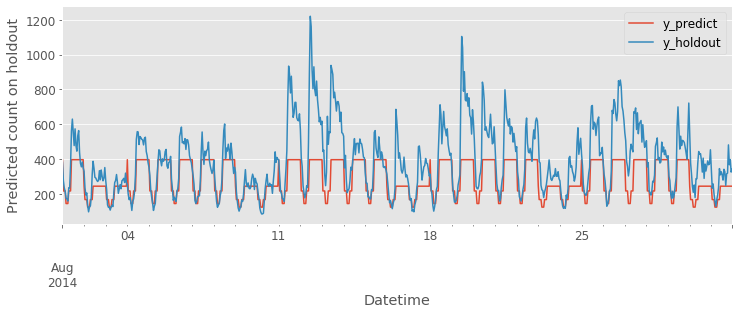

In [70]:
ax = df_y_compare[['y_predict','y_holdout']].plot(figsize=(12,4))
ax.set_ylabel('Predicted count on holdout');